# Building models

In [69]:
import pandas as pd
import sqlite3
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neural_network import MLPRegressor

In [70]:
PROJECT_ROOT = Path.cwd().parent
DATA_DIR = PROJECT_ROOT / "data"
DB_PATH: str = str(DATA_DIR / "ruokasuositusdata.db")

# With simple features

In [71]:
feature_df_v1 = pd.read_csv("feature_df_v1.csv")
feature_df_v1.iloc[:,:10]

,Pääraaka-aine_Kala,Pääraaka-aine_Kana,Pääraaka-aine_Kasvis,Pääraaka-aine_Katkarapu,Raskas_1,Raskas_2,Raskas_3,Hinta_1,Hinta_2,Hinta_3
0,0,0,2,1,1,1,1,1,1,1
1,3,0,0,0,0,2,1,0,2,1
2,0,2,1,0,1,2,0,0,1,2
3,1,0,2,0,0,2,1,1,2,0
4,3,0,0,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
495,0,0,2,1,1,1,1,0,1,2
496,0,2,1,0,2,0,1,0,3,0
497,1,1,0,1,0,2,1,0,2,1
498,1,1,0,1,1,0,2,0,1,2


In [72]:
X = feature_df_v1.iloc[:,:10].to_numpy()
y = feature_df_v1["score"].to_numpy()

In [73]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
regr = LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_val)

training_error = root_mean_squared_error(y_train, regr.predict(X_train))
val_error = root_mean_squared_error(y_val, y_pred)

print("Training error:", round(training_error, 3))
print("Validation error:", round(val_error, 3))

Training error: 1.344
Validation error: 1.51


In [75]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_val = poly.transform(X_val)

regr = LinearRegression(fit_intercept=False)
# regr = linear_model.Ridge(alpha=1.0, fit_intercept=False)
# regr = linear_model.Lasso(alpha=0.01, fit_intercept=False)
regr.fit(X_poly_train, y_train)
y_pred = regr.predict(X_poly_val)

training_error = root_mean_squared_error(y_train, regr.predict(X_poly_train))
val_error = root_mean_squared_error(y_val, y_pred)

print("Training error:", round(training_error, 3))
print("Validation error:", round(val_error, 3))

Training error: 1.085
Validation error: 1.238


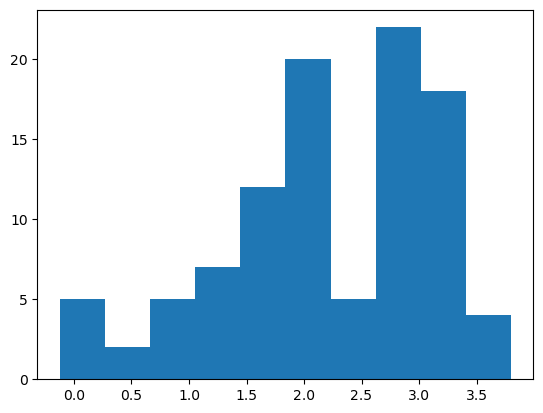

In [76]:
plt.hist(y_pred)
plt.show()

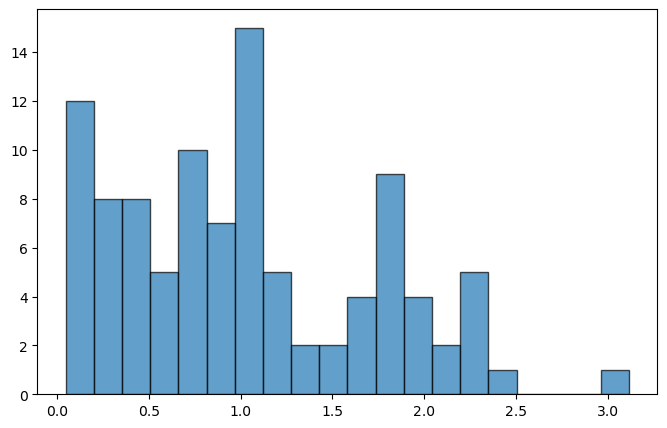

In [77]:
val_errors = abs(y_pred - y_val)

plt.figure(figsize=(8,5))
plt.hist(val_errors, bins=20, edgecolor='k', alpha=0.7)
plt.show()

In [78]:
regr = DecisionTreeRegressor(max_depth=7)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_val)

training_error = root_mean_squared_error(y_train, regr.predict(X_train))
val_error = root_mean_squared_error(y_val, y_pred)

print("Training error:", round(training_error, 3))
print("Validation error:", round(val_error, 3))

Training error: 0.95
Validation error: 1.297


In [79]:
# plt.figure(figsize=(50,40))
# plot_tree(regr)
# plt.show()

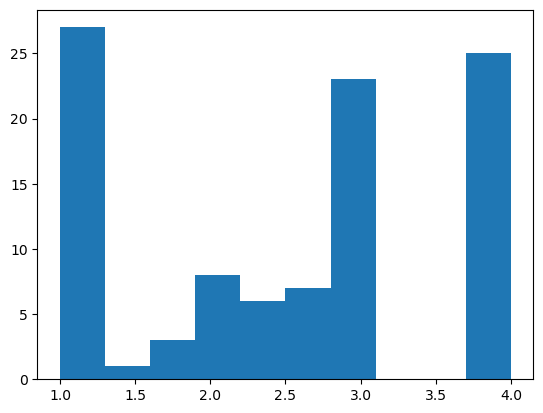

In [80]:
plt.hist(y_pred)
plt.show()

In [81]:
regr = RandomForestRegressor(max_depth=7)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_val)

training_error = root_mean_squared_error(y_train, regr.predict(X_train))
val_error = root_mean_squared_error(y_val, y_pred)

print("Training error:", round(training_error, 3))
print("Validation error:", round(val_error, 3))

Training error: 0.862
Validation error: 1.131


In [82]:
np.array([score for score, pred in zip(y_val, y_pred) if pred >= 3])

array([5, 5, 3, 1, 5, 3, 4, 5, 5, 2, 3, 4, 1, 5, 4, 4, 5, 4, 5, 5, 3, 5,
       2, 5, 3, 4, 5])

In [83]:
regr = MLPRegressor(hidden_layer_sizes=(50,20,10), max_iter=300)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_val)

training_error = root_mean_squared_error(y_train, regr.predict(X_train))
val_error = root_mean_squared_error(y_val, y_pred)

print("Training error:", round(training_error, 3))
print("Validation error:", round(val_error, 3))

Training error: 0.725
Validation error: 1.118


c:\Users\pyryp\anaconda3\envs\ruoka-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


The `RandomForestRegressor` and `MLPRegressor` seem to overfit.

# With new features

In [84]:
df = pd.read_csv("feature_df_v2.csv")
df = df.iloc[:,14:]
df.head()

,score,protein_entropy,raskas_entropy,hinta_entropy,raskas_var,raskas_mean,raskas_sum,hinta_sum,hinta_sum_square,hinta_sum_cube,toistuvuus_sum,katkarapu_ja_kala,similarity,dishes
0,4,0.918296,1.584963,1.584963,0.000000,1.0,6,6,36,216,16,1,2.191880,"Gnocchivuoka, Tomaattikeitto, Uuniperunat (ska..."
1,1,-0.000000,0.918296,0.918296,0.666667,1.0,7,7,49,343,15,3,2.206034,"Tonnikalapastavuoka, Kalakeitto, Uunilohi"
2,4,0.918296,0.918296,0.918296,0.666667,1.0,5,8,64,512,16,0,3.595743,"Kanapasta, Vihreä pasta, Gyros"
3,2,0.918296,0.918296,0.918296,0.666667,1.0,7,5,25,125,11,1,3.504498,"Kalapuikot, Gnocchivuoka, Kasvislasagne"
4,1,-0.000000,1.584963,1.584963,0.000000,1.0,6,6,36,216,15,3,3.079776,"Kalapuikot, Tonnikalapastavuoka, Savulohi"


In [85]:
# plt.hist(df["score"])

In [86]:
# X = df[["protein_entropy", "raskas_entropy", "hinta_sum_square", "similarity", "toistuvuus_sum", "katkarapu_ja_kala"]].to_numpy()
X = df[["protein_entropy", "raskas_entropy", "raskas_sum", "similarity", "toistuvuus_sum", "katkarapu_ja_kala"]].to_numpy()
y = df["score"].to_numpy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [87]:
regr = LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_val)

training_error = root_mean_squared_error(y_train, regr.predict(X_train))
val_error = root_mean_squared_error(y_val, y_pred)

print("Training error:", round(training_error, 3))
print("Validation error:", round(val_error, 3))

Training error: 1.153
Validation error: 1.227


In [88]:
regr.coef_

array([ 1.29380328,  0.38625924, -0.09762836, -0.20622168, -0.05243043,
       -0.38950572])

In [89]:
# df["preds"] = regr.predict(X)
# df.sort_values(by="preds", ascending=False).head(50)
# df.where((df["preds"]<3) & (df["score"]>4)).dropna()

In [90]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_val = poly.transform(X_val)

regr = LinearRegression(fit_intercept=False)
# regr = linear_model.Ridge(alpha=10.0, fit_intercept=False)
# regr = linear_model.Lasso(alpha=0.01, fit_intercept=False)
regr.fit(X_poly_train, y_train)
y_pred = regr.predict(X_poly_val)

training_error = root_mean_squared_error(y_train, regr.predict(X_poly_train))
val_error = root_mean_squared_error(y_val, y_pred)

print("Training error:", round(training_error, 3))
print("Validation error:", round(val_error, 3))

Training error: 1.049
Validation error: 1.15


In [91]:
df["preds"] = regr.predict(poly.fit_transform(X))
# df.sort_values(by="preds", ascending=False).head(50)
# df.where((df["preds"]<3) & (df["score"]>4)).dropna()
print("Predicted too high:", len(df.where((df["preds"]>3) & (df["score"]<3)).dropna()) / len(df.where(df["preds"]>3)))
print("Predicted too low:", len(df.where((df["preds"]<3) & (df["score"]>3)).dropna()) / len(df.where(df["preds"]<3)))

Predicted too high: 0.046
Predicted too low: 0.112


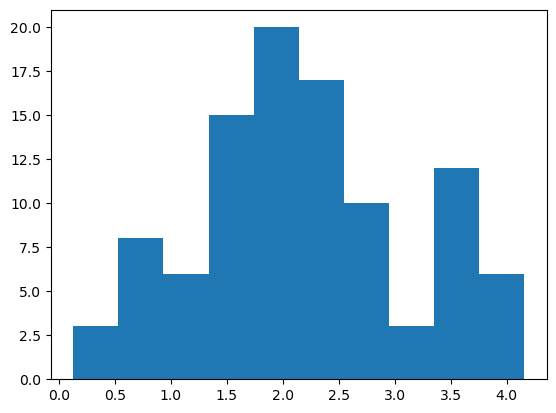

In [92]:
plt.hist(y_pred)
plt.show()

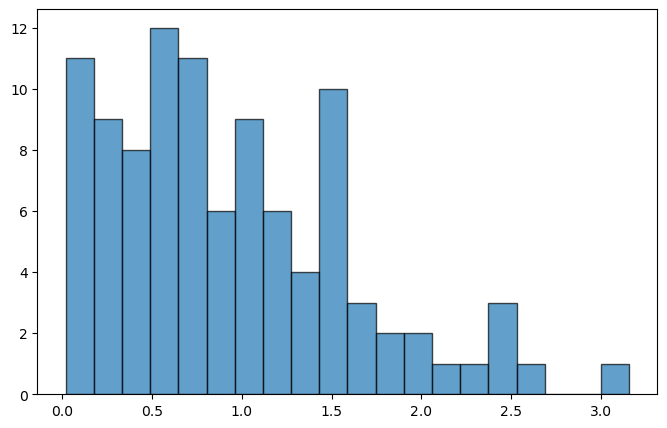

In [93]:
val_errors = abs(y_pred - y_val)

plt.figure(figsize=(8,5))
plt.hist(val_errors, bins=20, edgecolor='k', alpha=0.7)
plt.show()

In [94]:
regr = DecisionTreeRegressor(max_depth=7)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_val)

training_error = root_mean_squared_error(y_train, regr.predict(X_train))
val_error = root_mean_squared_error(y_val, y_pred)

print("Training error:", round(training_error, 3))
print("Validation error:", round(val_error, 3))

Training error: 0.768
Validation error: 1.242


In [95]:
# plt.figure(figsize=(50,40))
# plot_tree(regr)
# plt.show()

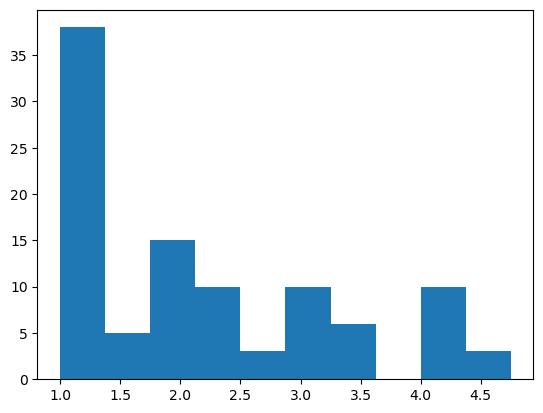

In [96]:
plt.hist(y_pred)
plt.show()

In [97]:
regr = RandomForestRegressor(max_depth=7)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_val)

training_error = root_mean_squared_error(y_train, regr.predict(X_train))
val_error = root_mean_squared_error(y_val, y_pred)

print("Training error:", round(training_error, 3))
print("Validation error:", round(val_error, 3))

Training error: 0.703
Validation error: 1.22


In [98]:
regr = MLPRegressor(hidden_layer_sizes=(50,20,10), max_iter=300)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_val)

training_error = root_mean_squared_error(y_train, regr.predict(X_train))
val_error = root_mean_squared_error(y_val, y_pred)

print("Training error:", round(training_error, 3))
print("Validation error:", round(val_error, 3))

Training error: 1.061
Validation error: 1.139


Again, the `RandomForestRegressor` and `MLPRegressor` seem to overfit.

Polynomial regression seems like a good balance between an model simplicity and low validation error.